Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Anouk van Veldhoven, 2008463"

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# exam June 7th, 2018



In the first cell of the notebook, give us your name and student number in the way indicated above. If you do this notebook with --at max.-- one other student, give her/his name and student number as well under "COLLABORATORS".

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam June 7, 2018".



## price effects of mergers

We consider a merger in this notebook. 

First we calculate the equilibrium with three firms, denoted by 1, 2 and 3. Then firms 2 and 3 merge so that we are left with 2 firms; denoted by 1 and 2.

We calculate the effects of the merger on the equilibrium price.

We start by importing the usual libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

The following code helps to calculate the equilibrium for the case with 3 firms. Note that you have seen similar code during the tutorials to calculate the equilibrium with 2 firms.

We assume that before the merger each firm has constant marginal costs equal to 0.3. We assume a simple linear (inverse) demand curve of the form $p=1-Q$ where $p$ denotes price and $Q$ total output on the market. Total output equals the sum of each firm's output: $Q= q_1 + q_2+q_3$.

In [2]:
c0 = 0.3
vector_c = [c0]*3

def p(Q):
    return 1 - Q

def costs(q,c):
    return c*q

def profits(q,Q_other,c):
    return p(q+Q_other)*q-costs(q,c)

def reaction(Q_other,c):
    q1 =  optimize.fminbound(lambda x: -profits(x,Q_other,c),0,1,full_output=1)
    return q1[0]

def fixed_point_three_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1]+vector_q[2],vector_c[0]),
            vector_q[1]-reaction(vector_q[0]+vector_q[2],vector_c[1]),
            vector_q[2]-reaction(vector_q[0]+vector_q[1],vector_c[2])]



#### a) [0.5 points] Show that total equilibrium output equals  0.525. Derive the equilibrium price and Herfindahl index; denote these by `P0` and `H0` resp.

In [3]:
initial_guess = [0,0,0]
q1 = optimize.fsolve(lambda q1: fixed_point_three_firms(q1,vector_c), initial_guess)
print(q1)

[0.175 0.175 0.175]


In [4]:
Q=q1[0]+q1[1]+q1[2]
print(Q)

0.525


I have calculated the output for the three seperate firms using optimize.fsolve. I then added these to calculate the total output Q. This is equal to 0.525.

In [5]:
P0= p(Q)
print(P0)
H0 = (q1[0]/Q)**2 +(q1[1]/Q)**2 + (q1[2]/Q)**2
print(H0)

0.475
0.3333333333333333


I calculated P0 using the outcome for Q. This is 0.475. Then I calculated the Herfindahl index which is equal to (q1/Q)^2 + (q2/Q)^2 + (q3/Q)^2. This is equal to 0.33333333333

#### b) [0.5 point] Define a function `fixed_point_two_firms` with the same structure as the function `fixed_point_three_firms` above, except that it derives the equilibrium output levels for a duopoly (two firms). Test this function by showing that each of the two firms produces 0.3333 in case both firms have zero costs.

In [6]:
def fixed_point_two_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1],vector_c[0]),
            vector_q[1]-reaction(vector_q[0],vector_c[1])]


In [7]:
initial_guess = [0,0]
q1 = optimize.fsolve(lambda q1: fixed_point_two_firms(q1,[0,0]), initial_guess)
print(q1)

[0.33333333 0.33333333]


I have adjusted the fixed_point_three_firms by taking the vector_q[2] out of it. then I calculated the output for each of the 2 firms again, but this time instead of using vector_c in which the costs were 0.3, I used the costs equal to 0. This lead to the answer of 0.3333333333


The Dutch competition authority, ACM, is asked to evaluate the effects of a merger between firms 2 and 3. Firms 2 and 3 claim that by merging they can reduce their constant marginal costs. But it is not clear by how much they will reduce their costs.

The ACM assumes that the marginal cost level of the merged firm is uniformly distributed between 0 and the current marginal cost level `c0`. The merger will not affect the marginal cost level of firm 1 who does not merge. Firm 1's cost level remains `c0`.

The next cell generates a vector of cost levels for the merged firm, denoted `c_after_merger`. Evaluate "c_after_merger" in a separate cell if you do not understand the command that defines it.

Then it calculates the equilibrium output levels for (the non-merging) firm 1 and (the merged) firm 2.

Note that you need to specify `initial_guess`.


In [8]:
c_after_merger = np.random.uniform(0,c0,size = 100)

In [9]:
c_after_merger = np.random.uniform(0,c0,size = 100)

q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]




#### c) [0.5 points] Create a dataframe called `df_after_merger` with three columns: `c_merged_firm`, `output_non_merging_firm`, `output_merged_firm` containing resp. the cost level of the merged firm, the output level of firm 1 and the output level of firm 2.

In [14]:
columns = ['c_merged_firm', 'output_non_merging_firm', 'output_merged_firm']
df_after_merger = pd.DataFrame(columns = columns)
counter = 0
for i in range(len(c_after_merger)):
            counter = counter + 1
            c_merged_firm = c_after_merger[i]
            output_non_merging_firm = q1_after_merger[i]
            output_merged_firm = q2_after_merger[i]
            df_after_merger.loc[counter]=[c_merged_firm, output_non_merging_firm, output_merged_firm]


In [15]:
df_after_merger.head()

,c_merged_firm,output_non_merging_firm,output_merged_firm
1,0.143403,0.181134,0.337731
2,0.218484,0.206161,0.287677
3,0.103980,0.167993,0.364013
4,0.197206,0.199069,0.301862
5,0.211165,0.203722,0.292556


I have created the dataframe df_after_merger using panda's dataframe. I first named the 3 columns. Then I indicated the data which needed to be in the columns, using the range of c_merged_firm to calculate the outputs. The 'head' command shows the dataframe. 

#### d) [0.5 points] Add three columns to the dataframe with resp. total equilibrium output on the market, `Q`, equilibrium price, `P` and the Herfindahl index, `H`.

In [17]:
df_after_merger['Q']=df_after_merger['output_non_merging_firm']+df_after_merger['output_merged_firm']
df_after_merger['P']=p(df_after_merger['Q'])
df_after_merger['H']=(df_after_merger['output_non_merging_firm']/df_after_merger['Q'])**2 + (df_after_merger['output_merged_firm']/df_after_merger['Q'])**2
df_after_merger.head()

,c_merged_firm,output_non_merging_firm,output_merged_firm,Q,P,H
1,0.143403,0.181134,0.337731,0.518866,0.481134,0.545543
2,0.218484,0.206161,0.287677,0.493839,0.506161,0.513623
3,0.103980,0.167993,0.364013,0.532007,0.467993,0.567879
4,0.197206,0.199069,0.301862,0.500931,0.499069,0.521055
5,0.211165,0.203722,0.292556,0.496278,0.503722,0.516021


I added the columns Q, P and H to the dataframe by giving the formulas with the other variables in the dataframe as input. The head command shows the dataframe. 

#### e) [0.5 points] Make a histogram of the equilibrium price `P` after the merger. Also indicate in the histogram the equilibrium price before the merger `P0`. Label the horizontal axis with $P$.

[hint: you may want to use matplotlib's `hist`, `vlines` and `legend` to make this graph (e.g use google to find these functions); but feel free to use something else]

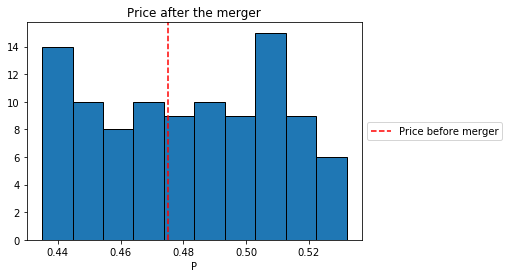

In [30]:
plt.hist(df_after_merger['P'],edgecolor = 'black')
plt.axvline(P0, color='red', linestyle='dashed', label = 'Price before merger')
plt.xlabel('P')
plt.title('Price after the merger')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

I have created a histogram showing the Price column of the df_after_merger dataframe. I have indicated the edgecolor to be black so that it becomes a clear image. Then I included a dashed red line representing p0, the price before the merger. I labled the x-axis P. I gave the histogram a title and I added a legend. The argument inside the plt.legend function are to make sure the legend is next to the plot and not inside, so it does not block anything of the histogram. 

#### f) [0.5 points] Explain why sometimes the equilibrium price after the merger exceeds the equilibrium price before the merger and sometimes it is lower than the pre-merger price. [hint: there is a trade off between two effects, depending on which effect dominates, equilibrium price increases or decreases after the merger]

Because of the merger, the marginal costs of the merged firms decrease. The equilibrium price depends on the output of the merged firms as well al the non-merged firm. These are the two different effects that influence the equilibrium price. The merged firms adjust their output to the change in costs, but the non-merged firm adjusts their reaction to the output and profit of the merged firms. Depending on which effect is bigger, the equilibrium price can be either lower or higher than the price before the merger. 

#### g) [0.5 points] Make a graph with the Herfindahl index on the horizontal axis and the equilibrium price on the vertical axis. This is straightforward for $(H,P)$ after the merger as both values are in the dataframe. Add in another color, the pre-merger combination `(H0,P0)` that we calculated above.

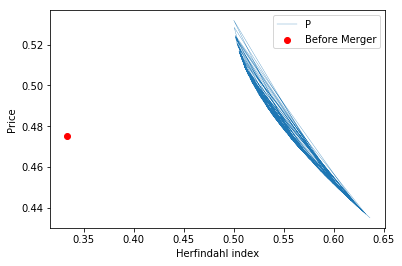

In [57]:
x=df_after_merger['H']
y=df_after_merger['P']
plt.plot(x,y, linewidth=0.3)
plt.scatter([H0],[P0], color = 'red', label = 'Before Merger')
plt.xlabel('Herfindahl index')
plt.ylabel('Price')
plt.legend()

I have made a matplotlib plot with H on the x-axis and P on the y-axis. I made sure the lines were somewhat seperately visible by adjusting the linewidth to 0.3. Then I added the H0,P0 point in the color red using plt.scatter. Then I labeled the x and y axes. I also added a legend to the plot. 

#### h) [0.5 points] Use the graph under g) to discuss the relation between the Herfindahl index and the equilibrium price. To illustrate, some people think that lower values of the Herfindahl index are associated with more competitive outcome. Would you agree with this?

As we can se in the graph, a higher Herfindahl index results in a lower equilibrium price. A low price is a sign that the market is very competitive. In this case I do not agree with what some people think, because the graph clearly shows that with a lower value of the Herfindahl index, the prices are higher, which means less competitiveness. 

## Github

After you have finished, we need to upload this notebook on github. Make sure that you upload the file on the github page of each collaborator.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.